In [6]:
from photutils.datasets import make_100gaussians_image
data = make_100gaussians_image()


from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(data, (50, 50), filter_size=(3, 3),
                   bkg_estimator=bkg_estimator)
data -= bkg.background  # subtract the background

threshold = 1.5 * bkg.background_rms

from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel
kernel = make_2dgaussian_kernel(3.0, size=5)  # FWHM = 3.0
convolved_data = convolve(data, kernel)

from photutils.segmentation import detect_sources
segment_map = detect_sources(convolved_data, threshold, npixels=10)
print(segment_map)

<photutils.segmentation.core.SegmentationImage>
shape: (300, 500)
nlabels: 87
labels: [ 1  2  3  4  5 ... 83 84 85 86 87]


Text(0.5, 1.0, 'Segmentation Image')

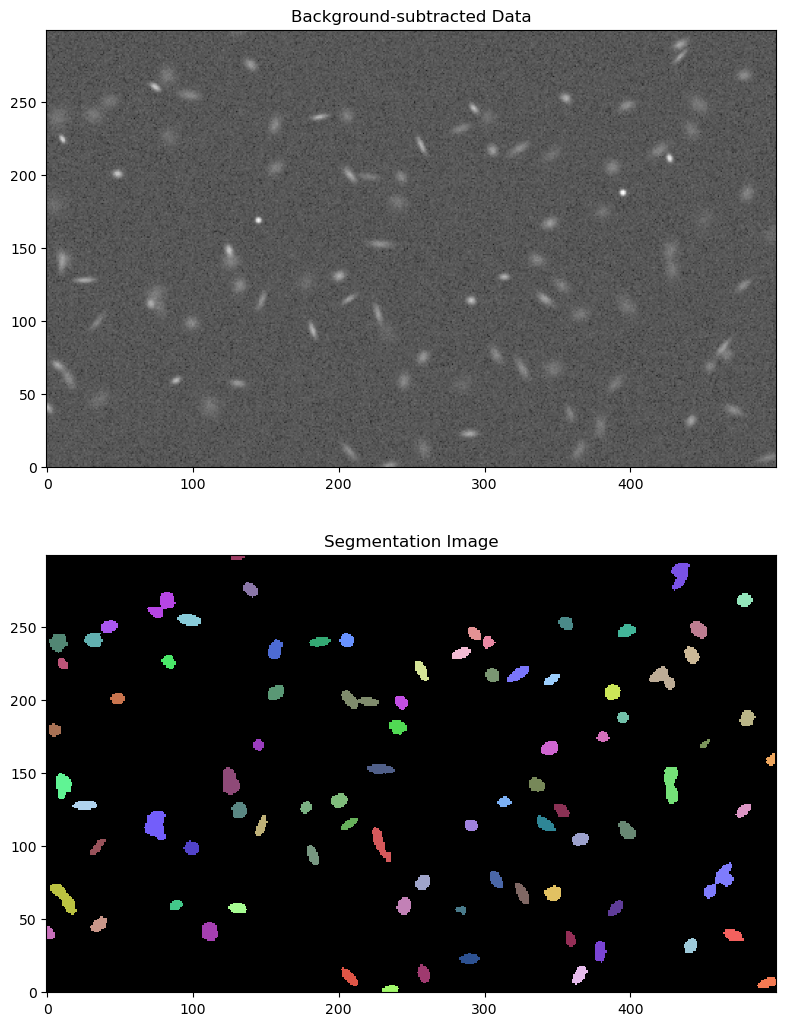

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Background-subtracted Data')
ax2.imshow(segment_map, origin='lower', cmap=segment_map.cmap,
           interpolation='nearest')
ax2.set_title('Segmentation Image')


In [8]:
from photutils.segmentation import deblend_sources
segm_deblend = deblend_sources(convolved_data, segment_map,
                               npixels=10, nlevels=32, contrast=0.001,
                               progress_bar=False)

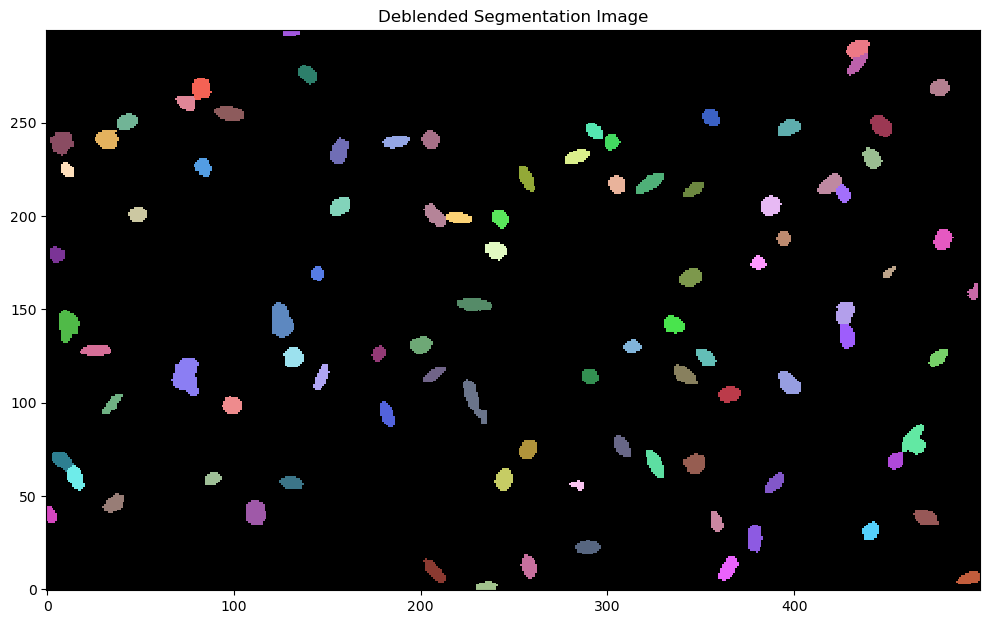

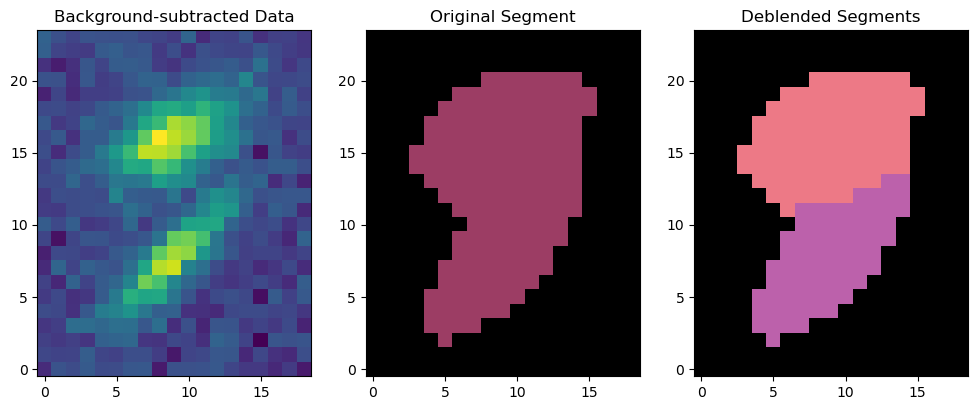

In [10]:
norm = ImageNormalize(stretch=SqrtStretch())
fig, ax = plt.subplots(1, 1, figsize=(10, 6.5))
ax.imshow(segm_deblend, origin='lower', cmap=segm_deblend.cmap,
          interpolation='nearest')
ax.set_title('Deblended Segmentation Image')
plt.tight_layout()

norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
slc = (slice(273, 297), slice(425, 444))
ax1.imshow(data[slc], origin='lower')
ax1.set_title('Background-subtracted Data')
cmap1 = segment_map.cmap
ax2.imshow(segment_map.data[slc], origin='lower', cmap=cmap1,
           interpolation='nearest')
ax2.set_title('Original Segment')
cmap2 = segm_deblend.cmap
ax3.imshow(segm_deblend.data[slc], origin='lower', cmap=cmap2,
           interpolation='nearest')
ax3.set_title('Deblended Segments')
plt.tight_layout()

In [11]:
from photutils.segmentation import SourceFinder
finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(convolved_data, threshold)
print(segment_map)

<photutils.segmentation.core.SegmentationImage>
shape: (300, 500)
nlabels: 94
labels: [ 1  2  3  4  5 ... 90 91 92 93 94]


In [12]:
from photutils.segmentation import SourceFinder
finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(convolved_data, threshold)
print(segment_map)

<photutils.segmentation.core.SegmentationImage>
shape: (300, 500)
nlabels: 94
labels: [ 1  2  3  4  5 ... 90 91 92 93 94]


In [13]:
from photutils.segmentation import SourceCatalog
cat = SourceCatalog(data, segm_deblend, convolved_data=convolved_data)
print(cat)

<photutils.segmentation.catalog.SourceCatalog>
Length: 94
labels: [ 1  2  3  4  5 ... 90 91 92 93 94]


In [14]:
tbl = cat.to_table()
tbl['xcentroid'].info.format = '.2f'  # optional format
tbl['ycentroid'].info.format = '.2f'
tbl['kron_flux'].info.format = '.2f'
print(tbl)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    235.31      1.45 ...             nan    509.74          nan
    2    493.92      5.79 ...             nan    544.31          nan
    3    207.42      9.81 ...             nan    722.26          nan
    4    364.86     11.11 ...             nan    704.23          nan
    5    258.27     11.94 ...             nan    661.22          nan
    6    289.52     22.32 ...             nan    863.94          nan
    7    379.16     27.35 ...             nan    734.26          nan
    8    441.31     31.18 ...             nan    745.13          nan
    9    358.54     35.88 ...             nan    492.43          nan
   10    111.77     40.99 ...             nan    914.06          nan
  ...       ...       ... ...             ...       ...          ...
   85    428.24    135.24 ...     

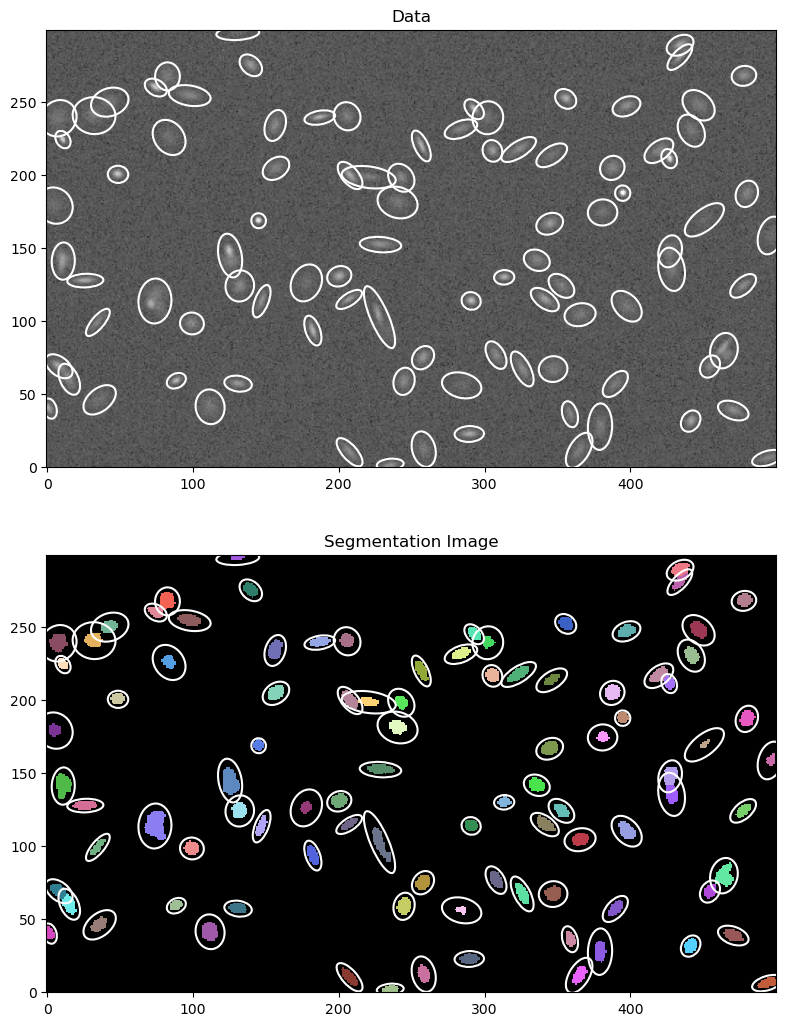

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
norm = simple_norm(data, 'sqrt')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
ax2.imshow(segm_deblend, origin='lower', cmap=segm_deblend.cmap,
           interpolation='nearest')
ax2.set_title('Segmentation Image')
cat.plot_kron_apertures(ax=ax1, color='white', lw=1.5)
cat.plot_kron_apertures(ax=ax2, color='white', lw=1.5)

In [16]:
cat = SourceCatalog(data, segm_deblend, convolved_data=convolved_data)
labels = [1, 5, 20, 50, 75, 80]
cat_subset = cat.get_labels(labels)
tbl2 = cat_subset.to_table()
tbl2['xcentroid'].info.format = '.2f'  # optional format
tbl2['ycentroid'].info.format = '.2f'
tbl2['kron_flux'].info.format = '.2f'
print(tbl2)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    235.31      1.45 ...             nan    509.74          nan
    5    258.27     11.94 ...             nan    661.22          nan
   20    346.99     66.83 ...             nan    811.70          nan
   50      5.29    178.94 ...             nan    614.46          nan
   75     42.96    249.88 ...             nan    617.18          nan
   80    130.75    297.10 ...             nan    246.91          nan


In [17]:
cat = SourceCatalog(data, segm_deblend, convolved_data=convolved_data)
labels = [1, 5, 20, 50, 75, 80]
cat_subset = cat.get_labels(labels)
columns = ['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tbl3 = cat_subset.to_table(columns=columns)
tbl3['xcentroid'].info.format = '.4f'  # optional format
tbl3['ycentroid'].info.format = '.4f'
tbl3['segment_flux'].info.format = '.4f'
print(tbl3)

label xcentroid ycentroid area segment_flux
                          pix2             
----- --------- --------- ---- ------------
    1  235.3128    1.4483 47.0     445.6095
    5  258.2727   11.9418 79.0     472.4109
   20  346.9920   66.8323 98.0     571.3138
   50    5.2910  178.9449 57.0     257.4050
   75   42.9629  249.8825 79.0     428.7122
   80  130.7542  297.1048 25.0     108.7877


In [18]:
cat = SourceCatalog(data, segm_deblend, background=bkg.background)
labels = [1, 5, 20, 50, 75, 80]
cat_subset = cat.get_labels(labels)
columns = ['label', 'background_centroid', 'background_mean',
           'background_sum']
tbl4 = cat_subset.to_table(columns=columns)
tbl4['background_centroid'].info.format = '{:.10f}'  # optional format
tbl4['background_mean'].info.format = '{:.10f}'
tbl4['background_sum'].info.format = '{:.10f}'
print(tbl4)

label background_centroid background_mean background_sum
----- ------------------- --------------- --------------
    1        5.2031964942    5.2026137494 244.5228462210
    5        5.2369908637    5.2229743435 412.6149731353
   20        5.2392999510    5.2702094547 516.4805265603
   50        5.1910069327    5.2466148918 299.0570488310
   75        5.2010736005    5.2249844756 412.7737735748
   80        5.2669562370    5.2642197829 131.6054945730


In [19]:
from photutils.utils import calc_total_error
effective_gain = 500.0
error = calc_total_error(data, bkg.background_rms, effective_gain)
cat = SourceCatalog(data, segm_deblend, error=error)
labels = [1, 5, 20, 50, 75, 80]
cat_subset = cat.get_labels(labels)  # select a subset of objects
columns = ['label', 'xcentroid', 'ycentroid', 'segment_flux',
           'segment_fluxerr']
tbl5 = cat_subset.to_table(columns=columns)
tbl5['xcentroid'].info.format = '{:.4f}'  # optional format
tbl5['ycentroid'].info.format = '{:.4f}'
tbl5['segment_flux'].info.format = '{:.4f}'
tbl5['segment_fluxerr'].info.format = '{:.4f}'
for col in tbl5.colnames:
    tbl5[col].info.format = '%.8g'  # for consistent table output
print(tbl5)

label xcentroid ycentroid segment_flux segment_fluxerr
----- --------- --------- ------------ ---------------
    1 235.24243 1.2020749    445.60947       14.634553
    5 258.29728 11.899213    472.41087       19.060458
   20 346.94871 66.802889    571.31384       21.674279
   50 5.2694265  178.9268    257.40504       16.431396
   75 43.030177 249.92847    428.71216       19.175229
   80 130.64209 297.11218    108.78768       10.882015
